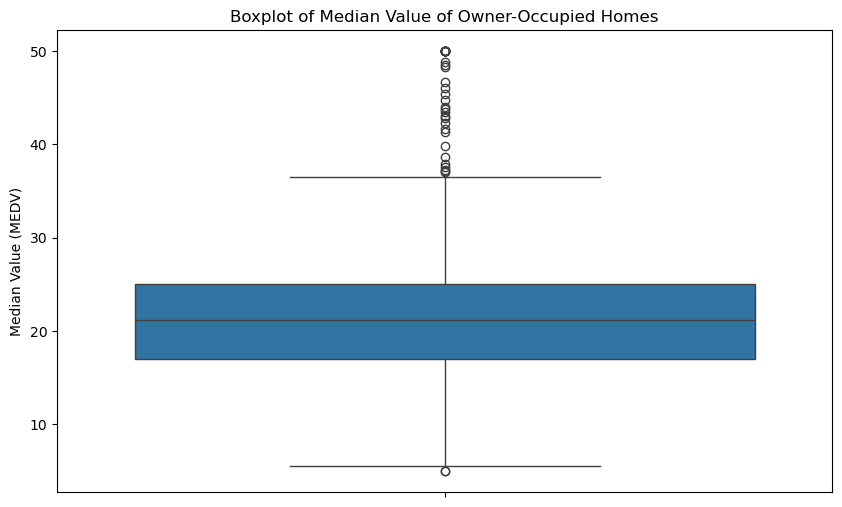

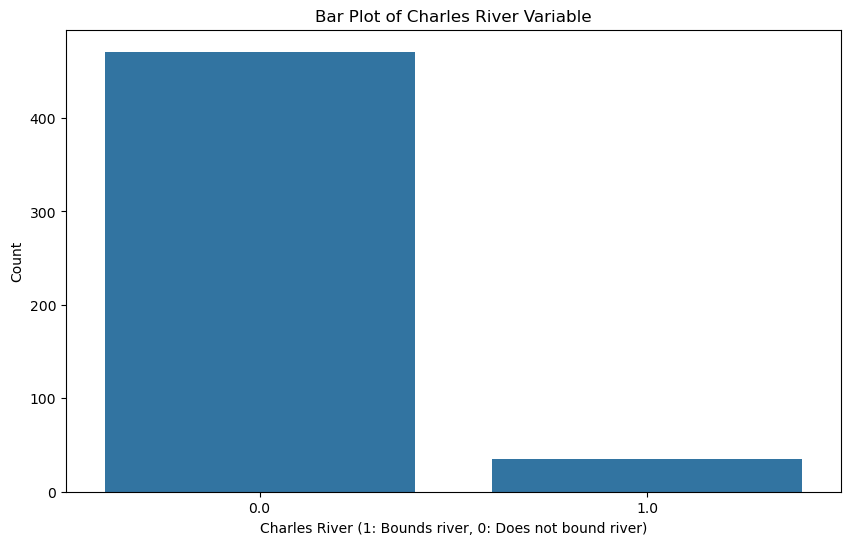

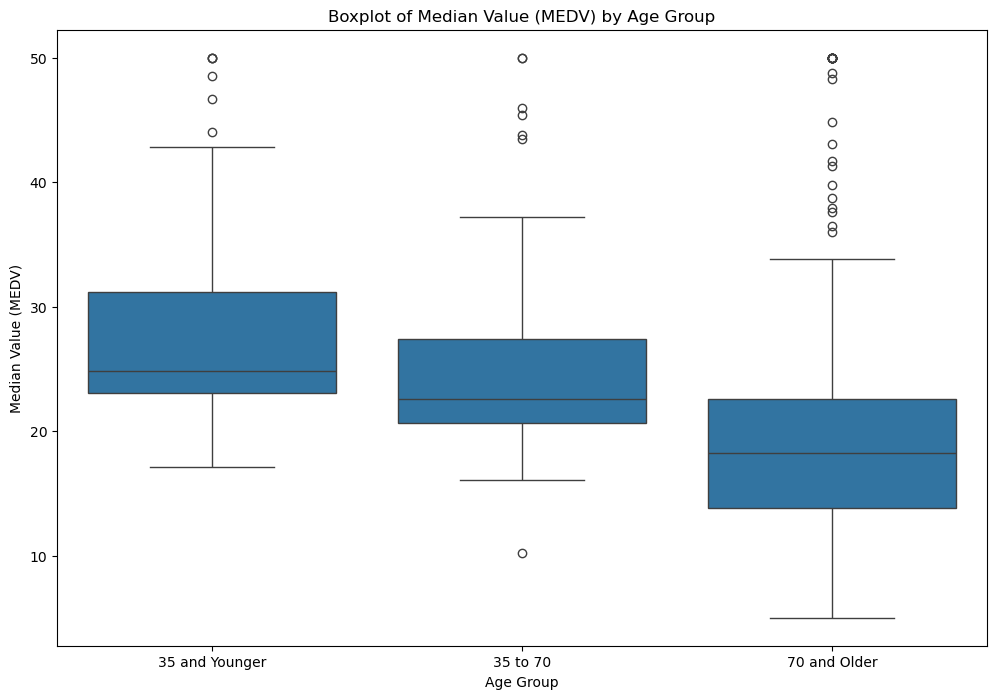

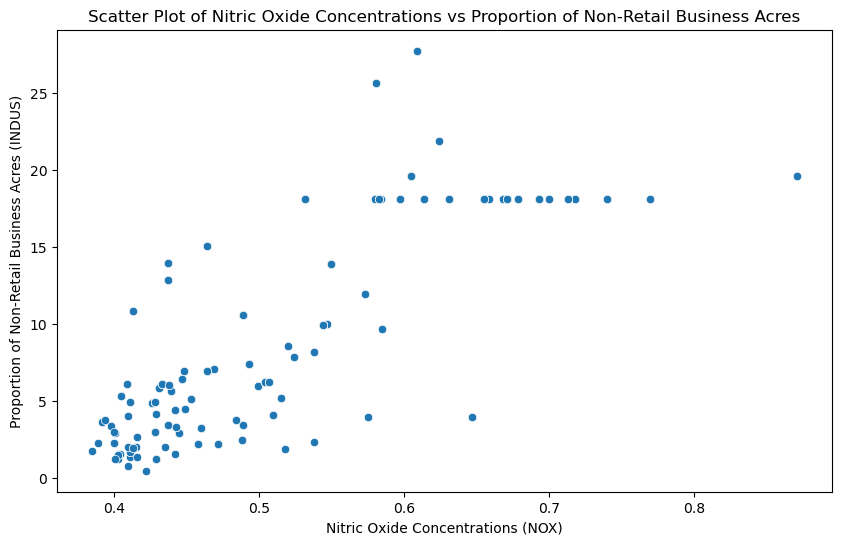

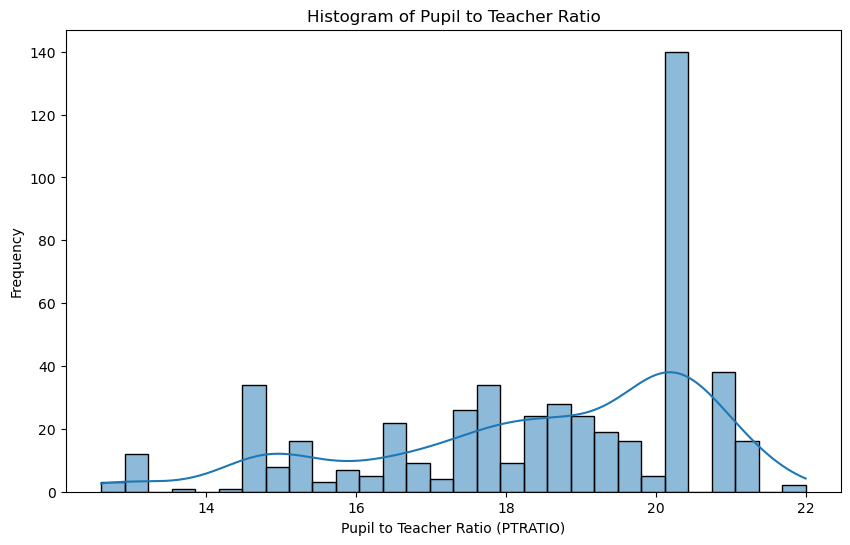

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

# 1. Boxplot for "Median value of owner-occupied homes"
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (MEDV)')
plt.show()

# 2. Bar plot for the Charles river variable
plt.figure(figsize=(10, 6))
sns.countplot(x=df['CHAS'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1: Bounds river, 0: Does not bound river)')
plt.ylabel('Count')
plt.show()

# 3. Boxplot for MEDV variable vs the discretized AGE variable
# Discretize AGE into three groups
bins = [0, 35, 70, np.inf]
labels = ['35 and Younger', '35 to 70', '70 and Older']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title('Boxplot of Median Value (MEDV) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (MEDV)')
plt.show()

# 4. Scatter plot for Nitric oxide concentrations vs the proportion of non-retail business acres
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['NOX'], y=df['INDUS'])
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

# 5. Histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10, 6))
sns.histplot(df['PTRATIO'], bins=30, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()


In [3]:
from scipy.stats import ttest_ind

# Separate the data into two groups based on CHAS
medv_chas_1 = df[df['CHAS'] == 1]['MEDV']
medv_chas_0 = df[df['CHAS'] == 0]['MEDV']

# Perform the t-test
t_stat, p_value = ttest_ind(medv_chas_1, medv_chas_0)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values of houses.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values of houses.")


T-Statistic: 3.9964
P-Value: 0.0001
Reject the null hypothesis: There is a significant difference in median values of houses.


In [5]:
from scipy.stats import f_oneway

# Perform ANOVA
anova_result = f_oneway(
    df[df['AGE_GROUP'] == '35 and Younger']['MEDV'],
    df[df['AGE_GROUP'] == '35 to 70']['MEDV'],
    df[df['AGE_GROUP'] == '70 and Older']['MEDV']
)

print(f"F-Statistic: {anova_result.statistic:.4f}")
print(f"P-Value: {anova_result.pvalue:.4f}")

# Conclusion
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values of houses across age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values of houses across age groups.")


F-Statistic: 36.4076
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in median values of houses across age groups.


In [7]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr_coeff, p_value = pearsonr(df['NOX'], df['INDUS'])

print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres.")


Pearson Correlation Coefficient: 0.7637
P-Value: 0.0000
Reject the null hypothesis: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres.


In [10]:
import statsmodels.api as sm

# Prepare the data for regression
X = df[['DIS']]
y = df['MEDV']
X = sm.add_constant(X)  # Add intercept

# Perform regression analysis
model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion
# Check p-value for DIS in the regression summary
if model.pvalues['DIS'] < alpha:
    print("Reject the null hypothesis: There is a significant impact of the weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of the weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        23:00:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0